In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
import re

In [41]:
import warnings
warnings.filterwarnings('ignore')

In [459]:
import pandas as pd
data1 = pd.read_excel("twin2_7.xlsx", sheet_name = 'Аудит')
data2 = pd.read_excel("twin2_10.xlsx", sheet_name = 'Аудит')
data3 = pd.read_excel("twin2_11.xlsx", sheet_name = 'Sheet1')
data4 = pd.read_excel("twin2_18.xlsx", sheet_name = 'Отчёт')

In [460]:
data1 = data1[data1['Длительность разговора с роботом'] > 0]
data2 = data2[data2['Длительность разговора с роботом'] > 0]
data3 = data3[data3['Длительность разговора с роботом'] > 0]
data4 = data4[data4['Длительность разговора с роботом'] > 0]

In [461]:
data1 = data1[['Текст разговора с роботом','NPS','Длительность разговора с роботом']]
data2 = data2[['Текст разговора с роботом','NPS','Длительность разговора с роботом']]
data3 = data3[['Текст разговора с роботом','NPS','Длительность разговора с роботом']]
data4 = data4[['Текст разговора с роботом','NPS','Длительность разговора с роботом']]

In [462]:
data_total_texts = pd.concat([data1,data2,data3,data4], ignore_index=True)
data_total_texts = data_total_texts [pd.notnull(data_total_texts ['Текст разговора с роботом'])]

In [465]:
def human_speech(x):
    lab = re.findall('\nЧеловек:(.*)\n', x) \
    + re.findall('\nЧеловек:(.*$)',x)
    
    if not bool('.'.join(lab)):
        
        lab = re.findall('\n Человек:(.*)\n', x) \
    + re.findall('\n Человек:(.*$)',x)
        
        return(' '.join(lab))
    else:
        return(' '.join(lab))

In [466]:
def human_answer(x):
    lab_iter = re.finditer('Робот:(.*)', x)
    lab_texts = re.findall('Робот:(.*)', x)
    
    exes = ['готовы оплатить текущий счет', 'оплатите услуги связи', 
           'оплата поступит', 'вы внесете платеж', 'Пополните баланс', 
           'вы готовы решить вопрос с оплатой', 'пополните счет в течение ближайших трех дней'
           'готовы оплатить текущий счет']
    for i in range(len(lab_texts)):
        for j in exes:
            if bool(re.findall(j, lab_texts[i])):
                text_first = list(lab_iter)[i-1].span()[1]
                text_last = list(lab_iter)[i].span()[0]
                break
        
        
    
    return(x[text_first:text_last])

In [467]:
data_total_texts['clean_texts'] = np.nan
for index, row in data_total_texts.iterrows():

    data_total_texts['clean_texts'].loc[index] = human_speech(row['Текст разговора с роботом'])

In [468]:
data_total_texts['len'] = np.nan

for index, row in data_total_texts.iterrows():
    
    data_total_texts['len'].loc[index] = len(' '.join(row['clean_texts'].replace(" ", "").split()))

In [46]:
data_total_texts.NPS.value_counts()

Связь прервалась               10422
Недозвон                        8900
Согласен оплатить               1514
Не пройдена верификация         1228
Должник неизвестен               610
Не передадут информацию          443
Отказ от оплаты                  398
Перезвонить                      148
Заявление о факте платежа        144
Просьба передать информацию      140
Отрицает долг                    107
Нужна помощь оператора            68
У клиента проблема                66
Умер                              43
Отказ от верификации              31
Неконструктивный диалог           20
Клиент болен                       9
Запрос реструктуризации            8
Name: NPS, dtype: int64

***

## Третье лицо 

***

> аналог третьего лица
* Должник неизвестен
* Не передадут информацию (известен)
* Просьба передать информацию (известен)

In [154]:
data_third = data_total_texts[(data_total_texts['NPS'] == 'Должник неизвестен')\
                 |(data_total_texts['NPS'] == 'Не передадут информацию')|(data_total_texts['NPS'] == 'Просьба передать информацию')]

In [155]:
#12689, 13443, 14411, 18913, 22344

In [367]:
test_ = data_third.loc[6261].values[0].split('\n')
test_ = list(filter(filter_len, test_))
test_

['Робот: Алло, здравствуйте',
 'Человек: а где это находится',
 'Робот: Это компания Ростелеком наш разговор записывается',
 'Робот: НЕЧЕПУРЕНКО ВЕРУ ИВАНОВНУ',
 'Робот: Могу услышать?',
 'Человек: понятно',
 'Робот: Извините, но я не смогу продолжить диалог пока не выясню, с кем конкретно я общаюсь',
 'Робот: НЕЧЕПУРЕНКО ВЕРУ ИВАНОВНУ',
 'Робот: Могу я услышать?',
 'Человек: почему ваше предложение лучше других таких же',
 'Робот: Скажите, а вы знакомы с',
 'Робот: НЕЧЕПУРЕНКО ВЕРОЙ ИВАНОВНОЙ',
 'Человек: ясно',
 'Робот: Спасибо за информацию, до свидания']

In [335]:
cc_flag = 0
for i in range(len(test_)):
    if bool(re.findall('(eвна|вич|евну|евной|вича|овна|овну|овной|нагу|нови|вичем|кызы|ничну|онича|мана)', test_[i].lower())) and len(re.findall('[А-Я]{1}', test_[i])) == 4:
        bb_know.append(i)
    if bool(re.findall('\\?', test_[i])):
        aa_person.append(i)
    if bool(re.findall('верно\\?', test_[i])):
        cc_flag += 1

In [196]:
def filter_len(x):
    if len(x)>9:
        
        return True
    else:
        
        return False

In [350]:
data_third['person'] = np.nan
data_third['know'] = np.nan

for index, row in data_third.iterrows():
    
    aa_person = []
    bb_know = []
    cc_flag = 0
    
    test_ = row['Текст разговора с роботом'].split('\n')
    test_ = list(filter(filter_len, test_))
    
    for i in range(len(test_)):
        if bool(re.findall('(eвна|вич|евну|евной|вича|овна|овну|овной|нагу|нови|вичем|кызы|ничну|онича|мана|ьич|ьича)', test_[i].lower())) and len(re.findall('[А-Я]{1}', test_[i])) >= 4:
            bb_know.append(i)
        if bool(re.findall('\\?', test_[i])):
            aa_person.append(i)
        if bool(re.findall('это вы(.*)\\?', test_[i])):
            cc_flag = 1
 
    # ----------------------------------------------
            
    if len(aa_person) == 0 and len(bb_know) == 0:
        continue
    
    # ------------------------------------------------
    
    elif len(aa_person) != 0 and len(bb_know) != 0:
    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        for cnt in [1,2,3,4]:
            
            try: #know part
                
                re.findall('Человек:(.*)', test_[bb_know[-1]+cnt])[0]
        
            except Exception as e:
            
                continue
            
            else:
            
                data_third['know'].loc[index] = re.findall('Человек:(.*)', test_[bb_know[-1]+cnt])[0]
                break
            
            
    # ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
        
        if len(set(aa_person)) >= 3 or cc_flag != 0: # person part
            
            for cnt in [1,2,3,4]:
            
                try: 
                
                    re.findall('Человек:(.*)', test_[aa_person[1]+cnt])[0]
        
                except Exception as e:
            
                    continue
            
                else:
            
                    data_third['person'].loc[index] = re.findall('Человек:(.*)', test_[aa_person[1]+cnt])[0]
                    break
        else:
            
            for cnt in [1,2,3,4]:
            
                try: #know part
                
                    re.findall('Человек:(.*)', test_[aa_person[0]+cnt])[0]
        
                except Exception as e:
            
                    continue
            
                else:
            
                    data_third['person'].loc[index] = re.findall('Человек:(.*)', test_[aa_person[0]+cnt])[0]
                    break
    # ----------------------------------------------------------------------------------------------------    
    elif len(aa_person) == 0 and len(bb_know) != 0:
        
        data_third['know'].loc[index] = re.findall('Человек:(.*)', test_[bb_know[-1]+1])[0]
        
    # -------------------------------------------------------------------------------------------------
        
    elif len(bb_know) == 0 and len(aa_person) != 0:
        
        if len(set(aa_person)) >= 3 or cc_flag != 0:
            
            data_third['person'].loc[index] = re.findall('Человек:(.*)', test_[aa_person[1]+1])[0]
        else:
            
            try:
                re.findall('Человек:(.*)', test_[aa_person[0]+1])[0]
                
            except Exception as e:
                
                data_third['person'].loc[index] = re.findall('Человек:(.*)', test_[aa_person[0]+2])[0]
                
            else:
                data_third['person'].loc[index] = re.findall('Человек:(.*)', test_[aa_person[0]+1])[0]
        

In [352]:
data_third[pd.isnull(data_third['person'])]

,Текст разговора с роботом,NPS,clean_texts,len,person,know


#### person or not

In [371]:
data_third.person.value_counts()

 нет                                              340
 почему ваше предложение лучше других таких же     55
 нет не можете                                     42
 суть вашего предложения                           11
 в чем для меня выгода                             10
                                                 ... 
 кого кого                                          1
 она здесь не живет                                 1
 что хотели                                         1
 а моя дочь                                         1
 его дома нет он в санаторий уехал                  1
Name: person, Length: 600, dtype: int64

* final - person or not
* 1193 - всего, 149 - автоответчик, 15 - есть контакт, 32 - ложное переключение или непонятно 

#### know or dont

In [378]:
data_third.NPS.value_counts()

Должник неизвестен             610
Не передадут информацию        443
Просьба передать информацию    140
Name: NPS, dtype: int64

In [379]:
data_third_dk = data_third[data_third['NPS'] == 'Должник неизвестен']

In [406]:
data_third_dk.know.value_counts()

 да                                        82
 а что с качеством                          8
 знаком                                     8
 да да                                      8
 знакома                                    8
                                           ..
 я знаком с шикович андрей георгиевичем     1
 я хреново а не хреново                     1
 так как нам оформить                       1
 так сведения о нем уже даны давно          1
 детальнее рассказать                       1
Name: know, Length: 373, dtype: int64

In [ ]:
# да - 1 2 2 1 4 5 1 5 21 0.35
# нет - 1 2 1 3 1 1 1 1 1 12 0.2
# невозможно понять (проскип ветки) - 1 1 2 1 1 2 2 2 3 15 0.25
# автоответчик - 1 1 2 2 1 7 0.15
# умер - 1 1 2 0.05
# 223 to final

In [ ]:
# да - 82 8 5 5 4 3 3 2 1 2 2
# нет - 5 3 2 1 1 
# невозможно понять (проскип ветки) - 12 9 6 3 3
# автоответчик - 8 8 7 7 7 6 10 6 9 14 15 1
# умер - 4 2 

* final - know or dont
* 610 - всего, 140+78+21 - знает, 98+33 + 7 - автоответчик, 12 + 44 + 12 -  не знает,  33 + 56 + 15- невозможно понять (проскип ветки), умер - 17
* в процентах приблизительно: 41% - знает, 23% - автоответчик, 17% - не знает, 17% - невозможно понять, 2% - умер

### give info

In [407]:
data_third_k = data_third[(data_third['NPS'] == 'Не передадут информацию')|(data_third['NPS'] == 'Просьба передать информацию')]

In [417]:
data_third_k.know.value_counts()

 да                                                     143
 знаком                                                  22
 знакома                                                 18
 да знаком                                               12
 да знакома                                              11
                                                       ... 
 да да да моя мам                                         1
 нет петр александрович сейчас нет дома это жена его      1
 да вы мне номер свой скажите она вам перезвонит          1
 ка знакомы                                               1
 я ее брат доверенное лицо                                1
Name: know, Length: 335, dtype: int64

In [ ]:
# да - 143 22 18 12 11 8 8 7 22 40 ...
# нет - 4 2 2 1 1 1 1 4 ... 6/50
# автоответчик - 3 1 1 2 ... 2/50
# final - 285

* final - know or dont in give info 
* 583 - всего, 229 + 240 + 62 - знает, 18 - автоответчик, 33 -  не знает
* в процентах приблизительно: 91% - знает, 3% -  автоответичик, 6% - не знает или что еще либо

In [418]:
data_third_k['give_info'] = np.nan

for index, row in data_third_k.iterrows():
    
    test_ = row['Текст разговора с роботом'].split('\n')
    test_ = list(filter(filter_len, test_))
    
    human_last = []
    
    for i in range(len(test_)):
        if bool(re.findall('Человек:', test_[i])):
            human_last.append(i)
            
    human_last = human_last[-1]
    
    data_third_k['give_info'].loc[index] = re.findall('Человек:(.*)', test_[human_last])[0]
        
    

In [421]:
data_third_k_give = data_third_k[data_third_k['NPS'] == 'Просьба передать информацию']

In [425]:
data_third_k_give[data_third_k_give['give_info'] == ' да'].values[0][0]

'Робот: Алло, здравствуйте\nЧеловек: здравствуйте\nРобот: Это компания Ростелеком наш разговор записывается\nРобот: Турушеву Елену Викторовну\nРобот: Могу услышать?\nЧеловек: нет\nРобот: Скажите, а вы знакомы с\nРобот: Турушевой Еленой Викторовной\nЧеловек: да\nРобот: Уточните пожалуйста - кем вам приходится этот человек?\nЧеловек: \nЧеловек: \nЧеловек: \nЧеловек:'

In [435]:
data_third_k_give.give_info.value_counts()

 да                                                28
 мама                                               5
 муж                                                4
 супруг                                             3
 никем                                              3
                                                   ..
 никем я не знаю этого человека                     1
 нет такого                                         1
 родственника                                       1
 я вам еще раз говорю я не знаю такого человека     1
 конечно знаком                                     1
Name: give_info, Length: 95, dtype: int64

In [431]:
# не было речи про передачу информации (диалог заканчивается на знаете или вы такого) - 
# согласие передать - 13
# не знает - 50
# знает на этом все 

* final - know and give info
* 140 - всего, 55% - знает,  35% - не знает, 10% - передаст инфу

In [436]:
data_third_k_not_give = data_third_k[data_third_k['NPS'] == 'Не передадут информацию']

In [451]:
data_third_k_not_give[data_third_k_not_give['give_info'] == ' нет не надо все хорошо я понял'].values[0][0]

'Робот: Алло, здравствуйте\nЧеловек: здравствуйте\nРобот: Это компания Ростелеком наш разговор записывается\nРобот: Бембеева Санчира Соятовича\nРобот: Могу услышать?\nЧеловек: вы его не слышите я сын говорите\nРобот: Компания Ростелеком. Меня зовут Виктория\nРобот: Скажите пожалуйста\nРобот: Бембеев Санчир Соятович\nРобот: это вы? верно?\nЧеловек: нет не я\nРобот: Скажите, а вы знакомы с\nРобот: Бембеевым Санчиром Соятовичем\nЧеловек: да знаком\nРобот: Уточните пожалуйста - кем вам приходится этот человек?\nЧеловек: мне он доводит отцу\nРобот: Подскажите Вы сможете передать информацию, которую я вам сейчас озвучу\nЧеловек: нет не надо все хорошо я понял\nРобот: Всего доброго!'

In [452]:
data_third_k_not_give.give_info.value_counts()

 нет                                      80
 нет спасибо                              29
 нет не нужно                             19
 нет не надо                              12
 не надо                                   5
                                          ..
 понял                                     1
 нет у меня есть номер ростелекома         1
 ну не забуду передам                      1
 нет можете мне эту информацию сказать     1
 я хотел с вами лично поговорить           1
Name: give_info, Length: 279, dtype: int64

In [ ]:
# нет - 12/30
# готовы передать - 2 2 1 1 1 1 1 ... 8/30
# автоответчик - 9 ... 1/30
# не знают - 3 ... 2/30
# ранний проскип - 3 ... 3/30
# другая категория else

* final - know and give info
* 443 - всего, 166 + (76/38) - нет, 9 + (50/88) - да, ~ 15 - автоответичк, ... - остальное 
> примеры варьирования передам - не передам зависят от трактовки сообщений человека, пример см. выше, "нет не нада все хорошо я понял" для меня, как для человека, значит хорошо я понял ваш посыл я передам, не надо дальше продолжать диалог,  а для работа это отказ 
* в процентах приблизительно: (45-55)% - не передаст, (12-22)% -  передадут, 30% - остальное 

***

## Связь прервалась

***

In [469]:
data_lost = data_total_texts[data_total_texts['NPS'] == 'Связь прервалась']

In [840]:
data_lost.len.value_counts().sum()

10422

In [505]:
dummy_conversation = data_lost[(data_lost['len'] <= 6)|(data_lost['len'] == 12)]['Длительность разговора с роботом'].mean()
count_dummy = data_lost[(data_lost['len'] <= 6)|(data_lost['len'] == 12)]['Длительность разговора с роботом'].count()

In [506]:
print('%s -> %.1f seconds and %d times ' % ('Средняя длительность и кол-во звонков без реакции', dummy_conversation, count_dummy))

Средняя длительность и кол-во звонков без реакции -> 19.4 seconds and 6648 times 


### Отсекаем пустых и "здравствуйте"

In [772]:
data_lost_full = data_lost[(data_lost['len'] > 6)&(data_lost['len'] != 12)]

In [855]:
data_lost_full['off'] = np.nan

variants = ['соединение', 'недоступен', 'отвечает','сигнал', 'сигнала', 'звонка', 'немедленно', 'ответить', 'занят',
 'переадресован', 'почтовый', 'автоответчик', 'ящик', 'звонок', 'абонент', 'помощник', 'абонента', 'сообщение', 'смс',
           'подробнее', 'поподробнее', 'записал', 'отправил', 'отправила', 'качеством', 'длительность сообщения',
           'качество', 'предложения', 'предложение', 'секретарь','вызов', 'стоит', 'интересно', 'детальнее', 'ответчик', 
           'обслуживание']

for index, row in data_lost_full.iterrows():
    for i in variants:
        if bool(re.findall(i, row['clean_texts'])):
            data_lost_full['off'].loc[index] = 1
            break
        else:
            data_lost_full['off'].loc[index] = 0

In [856]:
auto_full = data_lost_full[data_lost_full['off'] == 1]['Длительность разговора с роботом'].mean()
auto_count = data_lost_full[data_lost_full['off'] == 1]['Длительность разговора с роботом'].count()

In [857]:
print('%s -> %.1f seconds and %d times ' % ('Средняя длительность и кол-во звонков c автоответчиком', auto_full, auto_count))

Средняя длительность и кол-во звонков c автоответчиком -> 30.1 seconds and 1119 times 


### Отсекаем автоответчики

In [858]:
data_lost_full_2 = data_lost_full[data_lost_full['off'] == 0]

In [859]:
data_lost_full_2['person'] = np.nan
data_lost_full_2['know'] = np.nan

for index, row in data_lost_full_2.iterrows():
    
    aa_person = []
    bb_know = []
    cc_flag = 0
    
    test_ = row['Текст разговора с роботом'].split('\n')
    test_ = list(filter(filter_len, test_))
    
    for i in range(len(test_)):
        if bool(re.findall('(eвна|вич|евну|евной|вича|овна|овну|овной|нагу|нови|вичем|кызы|ничну|онича|мана|ьич|ьича)', test_[i].lower())) and len(re.findall('[А-Я]{1}', test_[i])) >= 4:
            bb_know.append(i)
        if bool(re.findall('\\?', test_[i])):
            aa_person.append(i)
        if bool(re.findall('это вы(.*)\\?', test_[i])):
            cc_flag = 1
    
    try:
        test_[bb_know[-1]+1]
    
    except Exception as e:
        
        pass
    else:
        data_lost_full_2['know'].loc[index] = test_[bb_know[-1]+1]
    
    try:
        test_[aa_person[-1]+1]
    
    except Exception as e:
        
        pass
    else:
        data_lost_full_2['person'].loc[index] = test_[aa_person[-1]+1]

In [860]:
data_lost_full_2['person_no'] = np.nan

for index, row in data_lost_full_2.iterrows():
    
    if pd.notnull(row['person']):
    
        if bool(re.findall('(нет|не|ошиблись)', row['person'])):
            data_lost_full_2['person_no'].loc[index] = 1
        else:
            data_lost_full_2['person_no'].loc[index] = 0

In [861]:
wrong_full = data_lost_full_2[data_lost_full_2['person_no'] == 1]['Длительность разговора с роботом'].mean()
wrong_count = data_lost_full_2[data_lost_full_2['person_no'] == 1]['Длительность разговора с роботом'].count()

In [862]:
print('%s -> %.1f seconds and %d times ' % ('Средняя длительность и кол-во звонков c неправильным абонентом', wrong_full, wrong_count))

Средняя длительность и кол-во звонков c неправильным абонентом -> 30.1 seconds and 916 times 


### Отсекаем не абонентов

In [863]:
data_lost_full_3 = data_lost_full_2[data_lost_full_2['person_no'] != 1]

In [864]:
data_lost_full_3['last_call_human'] = np.nan
data_lost_full_3['last_call_robot'] = np.nan


for index, row in data_lost_full_3.iterrows():
    
    last_call = []
    
    test_ = row['Текст разговора с роботом'].split('\n')
    test_ = list(filter(filter_len, test_))
    
    for i in range(len(test_)):
        if bool(re.findall('Человек', test_[i])):
            last_call.append(i)
    
    try:
        
        test_[last_call[-1]]
    
    except Exception as e:
        
        pass
    
    else:
        
        data_lost_full_3['last_call_human'].loc[index] = re.findall('Человек:(.*)', test_[last_call[-1]])[0]
        
    finally:
        
        for cnt in [1,2,3,4]:
            
                try: 
                
                     test_[last_call[-1]]
        
                except Exception as e:
            
                    continue
            
                else:
                    
                    if not bool(re.findall('Робот:(.*)', test_[last_call[-1]-cnt])):
                        
                        continue
                    
                    else:
            
                        data_lost_full_3['last_call_robot'].loc[index] = re.findall('Робот:(.*)', test_[last_call[-1]-cnt])[0]
                        break

In [865]:
data_lost_full_3['robot_hello'] = np.nan

for index, row in data_lost_full_3.iterrows():
    
    if bool(re.findall('(Алло|алло)', row['last_call_robot'])):
        
        data_lost_full_3['robot_hello'].loc[index] = 1
        
    else:
        
        data_lost_full_3['robot_hello'].loc[index] = 0

In [866]:
lost_hello_full = data_lost_full_3[data_lost_full_3['robot_hello'] == 1]['Длительность разговора с роботом'].mean()
lost_hello_count = data_lost_full_3[data_lost_full_3['robot_hello'] == 1]['Длительность разговора с роботом'].count()

In [867]:
print('%s -> %.1f seconds and %d times ' % ('Средняя длительность и кол-во звонков c обрывом связи на приветствии', lost_hello_full, lost_hello_count))

Средняя длительность и кол-во звонков c обрывом связи на приветствии -> 17.3 seconds and 579 times 


### Отсекаем обрыв связи на приветствии

In [868]:
data_lost_full_4 = data_lost_full_3[data_lost_full_3['robot_hello'] == 0]

In [869]:
data_lost_full_4['human_ident'] = np.nan

for index, row in data_lost_full_4.iterrows():
    
    if bool(re.findall('(услышать|это)', row['last_call_robot'])) and bool(re.findall('(конечно|да|я|слушаю|можете|угу|ага|говорите|хотели)', row['last_call_human'])):
        
        data_lost_full_4['human_ident'].loc[index] = 1
        
    elif bool(re.findall('(услышать|это)', row['last_call_robot'])):
        
        data_lost_full_4['human_ident'].loc[index] = 0

In [870]:
ident_full = data_lost_full_4[data_lost_full_4['human_ident'] == 1]['Длительность разговора с роботом'].mean()
ident_count = data_lost_full_4[data_lost_full_4['human_ident'] == 1]['Длительность разговора с роботом'].count()

not_ident_full = data_lost_full_4[data_lost_full_4['human_ident'] == 0]['Длительность разговора с роботом'].mean()
not_ident_count = data_lost_full_4[data_lost_full_4['human_ident'] == 0]['Длительность разговора с роботом'].count()

In [871]:
print('%s -> %.1f seconds and %d times ' % ('Средняя длительность и кол-во звонков обрыв прошел идентификацию', ident_full, ident_count))
print()
print('%s -> %.1f seconds and %d times ' % ('Средняя длительность и кол-во звонков обрыв не прошел идентификацию', not_ident_full, not_ident_count))
print()
print('Среди не прошедших идентификацию могут быть и те кто уже заплатил или кому звонили ранее')

Средняя длительность и кол-во звонков обрыв прошел идентификацию -> 31.4 seconds and 484 times 

Средняя длительность и кол-во звонков обрыв не прошел идентификацию -> 27.6 seconds and 124 times 

Среди не прошедших идентификацию могут быть и те кто уже заплатил или кому звонили ранее


### Отсекаем обрыв идентификации

In [872]:
data_lost_full_5 = data_lost_full_4[pd.isnull(data_lost_full_4['human_ident'])]

In [873]:
# оплата сумму оплатить оплату

In [874]:
data_lost_full_5['pay_flag'] = np.nan

for index, row in data_lost_full_5.iterrows():
    
    if bool(re.findall('(оплата|сумму|оплатить|оплату)', row['last_call_robot'])):
        
        data_lost_full_5['pay_flag'].loc[index] = 1
        
    else:
        
        data_lost_full_5['pay_flag'].loc[index] = 0

In [875]:
# чатсично возможно половину посмотрим скорее всего

In [876]:
# да конечно поступит постараюсь  угу ага успею естественно постараемся хорошо всю сумму 

In [877]:
mid_pay_df = data_lost_full_5[data_lost_full_5['pay_flag'] == 1]

In [878]:
mid_pay_df['agreed'] = np.nan

for index, row in mid_pay_df.iterrows():
    
    if bool(re.findall('(частично|возможно|половину|посмотрим|скорее|получится|наверное|половина)', row['last_call_human'])):
        
        mid_pay_df['agreed'].loc[index] = 0
        
    elif bool(re.findall('(уже|внесем|понял|да|конечно|поступит|постараюсь|угу|ага|успею|хорошо|естественно|постараемся|всю сумму)', row['last_call_human'])):
        
        mid_pay_df['agreed'].loc[index] = 1

In [879]:
pay_prob = mid_pay_df[mid_pay_df['agreed'] == 0].shape[0]
pay_say = mid_pay_df[mid_pay_df['agreed'] == 1].shape[0]
operator_prob = mid_pay_df[pd.isnull(mid_pay_df['agreed'])].shape[0]

In [880]:
print('%s -> %d probably times %d yes times ' % ('Возможно произведут и произведут оплату соответсвенно', pay_prob, pay_say))
print()
print('%s -> %d count operator case  ' % ('Нужна помощь оператора', operator_prob))

Возможно произведут и произведут оплату соответсвенно -> 42 probably times 190 yes times 

Нужна помощь оператора -> 136 count operator case  


In [881]:
mid_not_pay_df = data_lost_full_5[data_lost_full_5['pay_flag'] == 0]

In [882]:
print('%s -> %d count disconnect case  ' % ('В основном дисконект робота и человека: человек либо опатитил/оплатит либо обрыв либо нужен оператор', mid_not_pay_df.shape[0]))

В основном дисконект робота и человека: человек либо опатитил/оплатит либо обрыв либо нужен оператор -> 184 count disconnect case  


### Итог на связь прервалась

* всего 10422
* 6648 разговор без реакции 64%
* 1119 автоответчики 10.5%
* 916 звонок третьему лицу 8.8%
* 582 обрыв на приветствии 5.6%
* 484 обрыв прошел идентификацию 4.6%
* 124 обрыв не прошел идентификацию 1.2%
* 190 оплатит 1.9%
* 42 возможно оплатит 0.4%
* 136 помощь оператора 1.3%
* 184 неопределено 1.9%

# Недозвон

In [883]:
data_connect = data_total_texts[data_total_texts['NPS'] == 'Недозвон']

In [891]:
data_connect['off'] = np.nan

variants = ['соединение', 'недоступен', 'отвечает','сигнал', 'сигнала', 'звонка', 'немедленно', 'ответить', 'занят',
 'переадресован', 'почтовый', 'автоответчик', 'ящик', 'звонок', 'абонент', 'помощник', 'абонента', 'сообщение', 'смс',
           'подробнее', 'поподробнее', 'записал', 'отправил', 'отправила', 'качеством', 'длительность сообщения',
           'качество', 'предложения', 'предложение', 'секретарь', 'вызов', 'стоит', 'интересно', 'детальнее', 'ответчик', 
           'обслуживание', 'актуально']

for index, row in data_connect.iterrows():
    for i in variants:
        if bool(re.findall(i, row['clean_texts'])):
            data_connect['off'].loc[index] = 1
            break
        else:
            data_connect['off'].loc[index] = 0

### все норм

# Не пройдена верификация

In [896]:
data_ver = data_total_texts[data_total_texts['NPS'] == 'Не пройдена верификация']

In [1044]:
data_ver.len.value_counts().sum()

1228

In [910]:
data_ver['off'] = np.nan

variants = ['соединение', 'недоступен', 'отвечает','сигнал', 'сигнала', 'звонка', 'немедленно', 'ответить', 'занят',
 'переадресован', 'почтовый', 'автоответчик', 'ящик', 'звонок', 'абонент', 'помощник', 'абонента', 'сообщение', 'смс',
           'подробнее', 'поподробнее', 'записал', 'отправил', 'отправила', 'качеством', 'длительность сообщения',
           'качество', 'предложения', 'предложение', 'секретарь', 'вызов', 'стоит', 'интересно', 'детальнее', 'ответчик', 
           'обслуживание', 'актуально', 'выгодно']

for index, row in data_ver.iterrows():
    for i in variants:
        if bool(re.findall(i, row['clean_texts'])) or row['len'] == 0:
            data_ver['off'].loc[index] = 1
            break
        else:
            data_ver['off'].loc[index] = 0

In [916]:
ver_full = data_ver[data_ver['off'] == 1]['Длительность разговора с роботом'].mean()
ver_count = data_ver[data_ver['off'] == 1]['Длительность разговора с роботом'].count()

In [917]:
print('%s -> %.1f seconds and %d times ' % ('Средняя длительность и кол-во звонков на автоответчик', ver_full, ver_count))

Средняя длительность и кол-во звонков на автоответчик -> 52.8 seconds and 657 times 


In [974]:
data_ver_full = data_ver[data_ver['off'] == 0]

In [997]:
data_ver_full['last_call_human'] = np.nan
data_ver_full['last_call_robot'] = np.nan


for index, row in data_ver_full.iterrows():
    
    last_call = []
    
    test_ = row['Текст разговора с роботом'].split('\n')
    test_ = list(filter(filter_len, test_))
    
    for i in range(len(test_)):
        if bool(re.findall('Человек', test_[i])):
            last_call.append(i)
    
    try:
        
        test_[last_call[-1]]
    
    except Exception as e:
        
        pass
    
    else:
        
        data_ver_full['last_call_human'].loc[index] = re.findall('Человек:(.*)', test_[last_call[-1]])[0]
        
    finally:
        
        for cnt in [1,2,3,4]:
            
                try: 
                
                     test_[last_call[-1]]
        
                except Exception as e:
            
                    continue
            
                else:
                    
                    if not bool(re.findall('Робот:(.*)', test_[last_call[-1]-cnt])):
                        
                        continue
                    
                    else:
                        
                        if bool(re.findall('фразу', re.findall('Робот:(.*)', test_[last_call[-1]-cnt])[0])):
                            
                            continue
            
                        else:
                            data_ver_full['last_call_robot'].loc[index] = re.findall('Робот:(.*)', test_[last_call[-1]-cnt])[0]
                            break

In [998]:
data_ver_full['human_ident'] = np.nan

for index, row in data_ver_full.iterrows():
    
    if bool(re.findall('(услышать|это)', row['last_call_robot'])) and \
    bool(re.findall('(нет|не можете|не я|не знаю)', row['last_call_human'])):
        
        data_ver_full['human_ident'].loc[index] = 0
    
    elif bool(re.findall('(услышать|это)', row['last_call_robot'])) \
    and bool(re.findall('(конечно|да|я|слушаю|можете|угу|ага|говорите|хотели)', row['last_call_human'])):
        
        data_ver_full['human_ident'].loc[index] = 1
    
    elif bool(re.findall('(услышать|это)', row['last_call_robot'])):
        
        data_ver_full['human_ident'].loc[index] = 2

In [1000]:
ver_not = data_ver_full[data_ver_full['human_ident'] == 0].shape[0]
ver_true = data_ver_full[data_ver_full['human_ident'] == 1].shape[0]
ver_lost = data_ver_full[data_ver_full['human_ident'] == 2].shape[0]

In [1001]:
print('%s -> lost abonent %d times ' % ('Количество не пройденных верификаций', ver_lost))
print()
print('%s -> true abonent %d times ' % ('Количество прошедших идентификацию - абонент', ver_true))
print()
print('%s -> false abonent %d times ' % ('Количество прошедших идентификацию - не абонент', ver_not))
print()
print('Часть абонентов из идентифицированных оплатят либо уже оплатили')

Количество не пройденных верификаций -> lost abonent 188 times 

Количество прошедших идентификацию - абонент -> true abonent 231 times 

Количество прошедших идентификацию - не абонент -> false abonent 58 times 

Часть абонентов из идентифицированных оплатят либо уже оплатили


In [1002]:
data_ver_full2 = data_ver_full[pd.isnull(data_ver_full['human_ident'])]

In [1011]:
data_ver_full2['pay_flag'] = np.nan

for index, row in data_ver_full2.iterrows():
    
    if bool(re.findall('(оплата|сумму|оплатить|оплату)', row['last_call_robot'])):
        
        data_ver_full2['pay_flag'].loc[index] = 1
        
    else:
        
        data_ver_full2['pay_flag'].loc[index] = 0

In [1014]:
mid_pay = data_ver_full2[data_ver_full2['pay_flag'] == 1]
mid_not_pay = data_ver_full2[data_ver_full2['pay_flag'] == 0]

In [1021]:
mid_pay['agreed'] = np.nan

for index, row in mid_pay.iterrows():
    
    if bool(re.findall('(частично|возможно|половину|посмотрим|скорее|получится|наверное|половина)', row['last_call_human'])):
        
        mid_pay['agreed'].loc[index] = 0
        
    elif bool(re.findall('(оплачу|заплачу|оплатим|уже|внесем|понял|да|конечно|поступит|постараюсь|угу|ага|успею|хорошо|естественно|постараемся|всю сумму)', row['last_call_human'])):
        
        mid_pay['agreed'].loc[index] = 1

In [1022]:
mid_pay_true = mid_pay[mid_pay['agreed'] == 1].shape[0]
mid_pay_false = mid_pay[mid_pay['agreed'] == 0].shape[0]
mid_other = mid_pay.shape[0] - mid_pay_true - mid_pay_false 

In [1023]:
print('%s -> %d times ' % ('Верификация пройдена - оплата неизвестно', mid_other))
print()
print('%s -> %d times ' % ('Верификация пройдена - согласие оплатить', mid_pay_true))
print()
print('%s -> %d times ' % ('Верификация пройдена - возможно оплатит', mid_pay_false))
print()
print('NB: часть обонентов могла уже оплатить')

Верификация пройдена - оплата неизвестно -> 11 times 

Верификация пройдена - согласие оплатить -> 20 times 

Верификация пройдена - возможно оплатит -> 4 times 

NB: часть обонентов могла уже оплатить


In [1041]:
mid_not_pay['ident'] = np.nan

for index, row in mid_not_pay.iterrows():
    
    if bool(re.findall('(вной|eвна|вич|евну|евной|вича|овна|овну|овной|нагу|нови|вичем|кызы|ничну|онича|мана|ьич|ьича)', row['last_call_robot'].lower())):
        
        
        if bool(re.findall('(нет|не знаком|)', row['last_call_human'])):
        
            mid_not_pay['ident'].loc[index] = 1
        
        else:
            
            mid_not_pay['ident'].loc[index] = 0
        

In [1042]:
mid_pay_dn = mid_not_pay[mid_not_pay['ident'] == 1].shape[0]
mid_pay_n = mid_not_pay[mid_not_pay['ident'] == 0].shape[0]
mid_other = mid_not_pay.shape[0] - mid_pay_dn - mid_pay_n

In [1043]:
print('%s -> %d times ' % ('Верификация пройдена - статус...', mid_other))
print()
print('%s -> %d times ' % ('Верификация пройдена - не знает абонента', mid_pay_dn))
print()
print('%s -> %d times ' % ('Верификация пройдена - знает абонента', mid_pay_n))
print()
print('NB: часть обонентов могла уже оплатить')

Верификация пройдена - статус... -> 24 times 

Верификация пройдена - не знает абонента -> 35 times 

Верификация пройдена - знает абонента -> 0 times 

NB: часть обонентов могла уже оплатить


### Итог не пройдена верификация

* всего 1228
* 657 автоответчики 53.5%
* 188 не пройдена верификация 15.3%
* 231 пройдена верификация - абонент 19%
* 58 - продена верификация - не абонент 4.7%
* 35 - пройдена верификауия - абонент - оплата неизвестно 2.8%
* 24 - пройдена верификация - абонент - согласие оплтатить 2%
* 35 - верификация пройдена - не знает абонента 2.8%

# Согласен оплатить

In [1059]:
data_model = data_total_texts[data_total_texts['NPS'] == 'Согласен оплатить']

In [1090]:
data_model['pay_answer'] = np.nan
for index, row in data_model.iterrows():
    
    robot_quest = []
    
    test_ = row['Текст разговора с роботом'].split('\n')
    test_ = list(filter(filter_len, test_))
    
    for i in range(len(test_)):
        
        if bool(re.findall('Робот:(.*)(оплата|сумму|оплатить|оплату)(.*)\\?', test_[i])):
            
            robot_quest.append(i)
    
    for cnt in [1,2,3,4,5]:
        
        try:
            
            re.search('Человек:', test_[robot_quest[-1]+cnt]).group(0)
        
        except Exception as e:
            
            continue
        
        else:
            
            data_model['pay_answer'].loc[index] = re.findall('Человек:(.*)', test_[robot_quest[-1]+cnt])[0]
            break
            
    


In [1106]:
variants = list(data_model.pay_answer.value_counts()[:40].index)

In [1108]:
data_model['pay_response'] = np.nan
for index, row in data_model.iterrows():
    
    for i in variants:
        
        if bool(re.findall(i, row['pay_answer'])):
            
            data_model['pay_response'].loc[index] = 1
            break

In [1111]:
data_model[pd.isnull(data_model['pay_response'])].head()

,Текст разговора с роботом,NPS,Длительность разговора с роботом,clean_texts,len,pay_answer,pay_response
1396,"Робот: Алло, здравствуйте\nЧеловек: здравствуй...",Согласен оплатить,146,здравствуйте да это я послушай полностью оп...,245.0,полностью сумму,NaN
2007,"Робот: Алло, здравствуйте\nЧеловек: \nРобот: Э...",Согласен оплатить,50,да это я да час,11.0,час,NaN
2034,"Робот: Алло, здравствуйте\nЧеловек: алло здрав...",Согласен оплатить,70,алло здравствуйте твой телефон да все трубо...,70.0,я сейчас опл,NaN
2159,"Робот: Алло, здравствуйте\nЧеловек: \nРобот: Э...",Согласен оплатить,59,слушаю вас верно поступит верно,27.0,верно,NaN
2652,"Робот: Алло, здравствуйте\nЧеловек: здравствуй...",Согласен оплатить,46,здравствуйте я вас слушаю поступит оплачу ...,45.0,полностью,NaN


### все норм

# Отказ

In [1191]:
data_refuse = data_total_texts[data_total_texts['NPS'] == 'Отказ от оплаты']

In [1192]:
data_refuse['pay_answer'] = np.nan
for index, row in data_refuse.iterrows():
    
    robot_quest = []
    
    test_ = row['Текст разговора с роботом'].split('\n')
    test_ = list(filter(filter_len, test_))
    
    for i in range(len(test_)):
        
        if bool(re.findall('Робот:(.*)(оплата|сумму|оплатить|оплату)(.*)\\?', test_[i])):
            
            robot_quest.append(i)
    
    for cnt in [1,2,3,4,5,-1,-2,-3,-4,-5]:
        
        try:
            
            re.search('Человек:', test_[robot_quest[-1]+cnt]).group(0)
        
        except Exception as e:
            
            continue
        
        else:
            
            data_refuse['pay_answer'].loc[index] = re.findall('Человек:(.*)', test_[robot_quest[-1]+cnt])[0]
            break
            
    

In [1252]:
data_refuse['pay_response'] = np.nan
for index, row in data_refuse.iterrows():
        
    if bool(re.findall('нет|не получится|не поступит|суд|не внесу|не будем|не могу|не нужен|не хочу|не буду', row['pay_answer'])) \
    or bool(re.findall('не получится|не поступит|суд|не внесу|не будем|не могу|не нужен|не хочу|не буду|не скажу', row['clean_texts'])):
            
        data_refuse['pay_response'].loc[index] = 1
    
    elif bool(re.findall('не знаю', row['pay_answer'])) or bool(re.findall('не знаю', row['clean_texts'])):
        
        data_refuse['pay_response'].loc[index] = 2
    
    elif bool(re.findall('( да | да|внесу|поступила|частично|половину|скорее|получится|наверное|половина|оплачу|заплачу|оплатим| уже |внесем|понял|конечно|поступит|постараюсь|угу|успею|хорошо|естественно|постараемся|всю сумму)', row['pay_answer']))\
    or bool(re.findall('(внесу|частично|половину|скорее|получится|наверное|половина|оплачу|заплачу|оплатим| уже |внесем|понял|конечно|поступит|постараюсь|угу|успею|хорошо|естественно|постараемся|всю сумму)', row['clean_texts'])):
        
        data_refuse['pay_response'].loc[index] = 0
        

In [1253]:
data_refuse_nan = data_refuse[pd.isnull(data_refuse['pay_response'])]

In [1254]:
data_refuse_nan['off'] = np.nan

variants = ['соединение', 'недоступен', 'отвечает','сигнал', 'сигнала', 'звонка', 'немедленно', 'ответить', 'занят',
 'переадресован', 'почтовый', 'автоответчик', 'ящик', 'звонок', 'абонент', 'помощник', 'абонента', 'сообщение', 'смс',
           'подробнее', 'поподробнее', 'записал', 'отправил', 'отправила', 'качеством', 'длительность сообщения',
           'качество', 'предложения', 'предложение', 'секретарь','вызов', 'стоит', 'интересно', 'детальнее', 'ответчик', 
           'обслуживание', 'актуально', 'лучше других', 'выгода']

for index, row in data_refuse_nan.iterrows():
    for i in variants:
        if bool(re.findall(i, row['clean_texts'])):
            data_refuse_nan['off'].loc[index] = 1
            break
        else:
            data_refuse_nan['off'].loc[index] = 0

In [1260]:
size_operator = data_refuse_nan[data_refuse_nan['off'] == 0].shape[0]
size_ao = data_refuse_nan[data_refuse_nan['off'] == 1].shape[0]
size_pay = data_refuse[data_refuse['pay_response'] == 0].shape[0]
size_not_pay = data_refuse[data_refuse['pay_response'] == 1].shape[0]
size_dn_pay = data_refuse[data_refuse['pay_response'] == 2].shape[0]

In [1270]:
print('%s -> %d all size %.2f not pay %.2f dont know whether pay %.2f will pay %.2f answerphone %.2f need operator' % ('Распределение статусов по статусу Отказ от оплаты', 
                          data_refuse.shape[0], size_not_pay/data_refuse.shape[0], size_dn_pay/data_refuse.shape[0],
                           size_pay/data_refuse.shape[0], size_ao/data_refuse.shape[0], size_operator/data_refuse.shape[0]
                          ))

Распределение статусов по статусу Отказ от оплаты -> 398 all size 0.69 not pay 0.13 dont know whether pay 0.08 will pay 0.03 answerphone 0.08 need operator


# Other - Перезвонить Факт платежа Отрицает долг Оператор Проблема

In [1280]:
data_model =data_total_texts[(data_total_texts['NPS'] == 'Перезвонить')|(data_total_texts['NPS'] == 'Заявление о факте платежа')|\
                             (data_total_texts['NPS'] == 'Отрицает долг')|(data_total_texts['NPS'] == 'Нужна помощь оператора')|\
                             (data_total_texts['NPS'] == 'У клиента проблема')]

### Preprocessing and tokenization

Comments contain raw text with punctuation, upper/lowercase letters and even newline symbols.

To simplify all further steps, we'll split text into space-separated tokens using one of nltk tokenizers.

In [1285]:
import nltk
import pymystem3
import gensim
import pymorphy2
import multiprocessing
from gensim.models import Word2Vec
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation
from navec import Navec

In [1286]:
morph = pymorphy2.MorphAnalyzer()
nltk.download("stopwords")
nltk.download('punkt')
mystem = Mystem() 
russian_stopwords = stopwords.words("russian")

[nltk_data] Error loading stopwords: <urlopen error [Errno 8] nodename
[nltk_data]     nor servname provided, or not known>
[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


In [1303]:
russian_stopwords.extend(['здравствовать', 'але', 'ало'])

In [1304]:
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [morph.parse(token)[0].normal_form for token in tokens]
    tokens = [token for token in tokens if token not in russian_stopwords \
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=|_|__|___)(?:-)?(?:\)|\(|D|P)', text)
    text = (re.sub('[\W]+', ' ', text.lower())+ ' '.join(emoticons).replace('-', '')).replace('_', '')
    
    tokens = []
    for sent in nltk.sent_tokenize(text, language = 'russian'):
        for word in nltk.word_tokenize(sent, language = 'russian'):
            if len(word) <= 1:
                continue
            word = morph.parse(word.lower())[0].normal_form
            tokens.append(word.lower())
    return tokens

In [1305]:
data_model['tokens'] = np.nan
data_model['tokens_agg'] = np.nan
for index, row in data_model.iterrows():
    data_model['tokens'].loc[index] = preprocess_text(row['clean_texts']) 
    data_model['tokens_agg'].loc[index] = ' '.join(preprocess_text(row['clean_texts']))

In [1306]:
# preprocess
texts_total_tokens = [preprocess_text(x) for x in data_model['clean_texts']]

In [1307]:
path = '/Users/stanislavilusin/Desktop/Python/navec_hudlit_v1_12B_500K_300d_100q.tar'
navec = Navec.load(path)

In [1308]:
def vectorize_sum(comment):
    embedding_dim = navec.pq.dim
    features_skip = np.zeros([embedding_dim], dtype='float32')
    features_skip_end = []
    try:
        [navec[x] for x in comment]
        
    except Exception as e:
        
        for number, i in enumerate(comment):
            try:
                navec[i]
            except Exception as e:
                features_skip_end.append(features_skip)
            else:
                features_skip_end.append(navec[i])
        
        return np.array(features_skip_end).sum(axis = 0)
                
    
    else:
        
        features = np.array([navec[x] for x in comment]).sum(axis=0)
        return features

In [1322]:
texts_navec = np.stack(vectorize_sum(text) if len(text)>=1 else np.zeros(navec.pq.dim) for text in texts_total_tokens) #texts_total_tokens

In [1323]:
texts_navec.shape

(533, 300)

In [1325]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(texts_navec)
X_tsne_data = np.vstack((X_tsne.T, data_model.NPS.values)).T
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'class'])
df_tsne.head()

,Dim1,Dim2,class
0,-15.318798,-7.702305,Перезвонить
1,-5.832565,-3.087792,Отрицает долг
2,0.506294,-2.422985,У клиента проблема
3,-8.081891,1.424908,Отрицает долг
4,-2.214975,-7.145508,Перезвонить


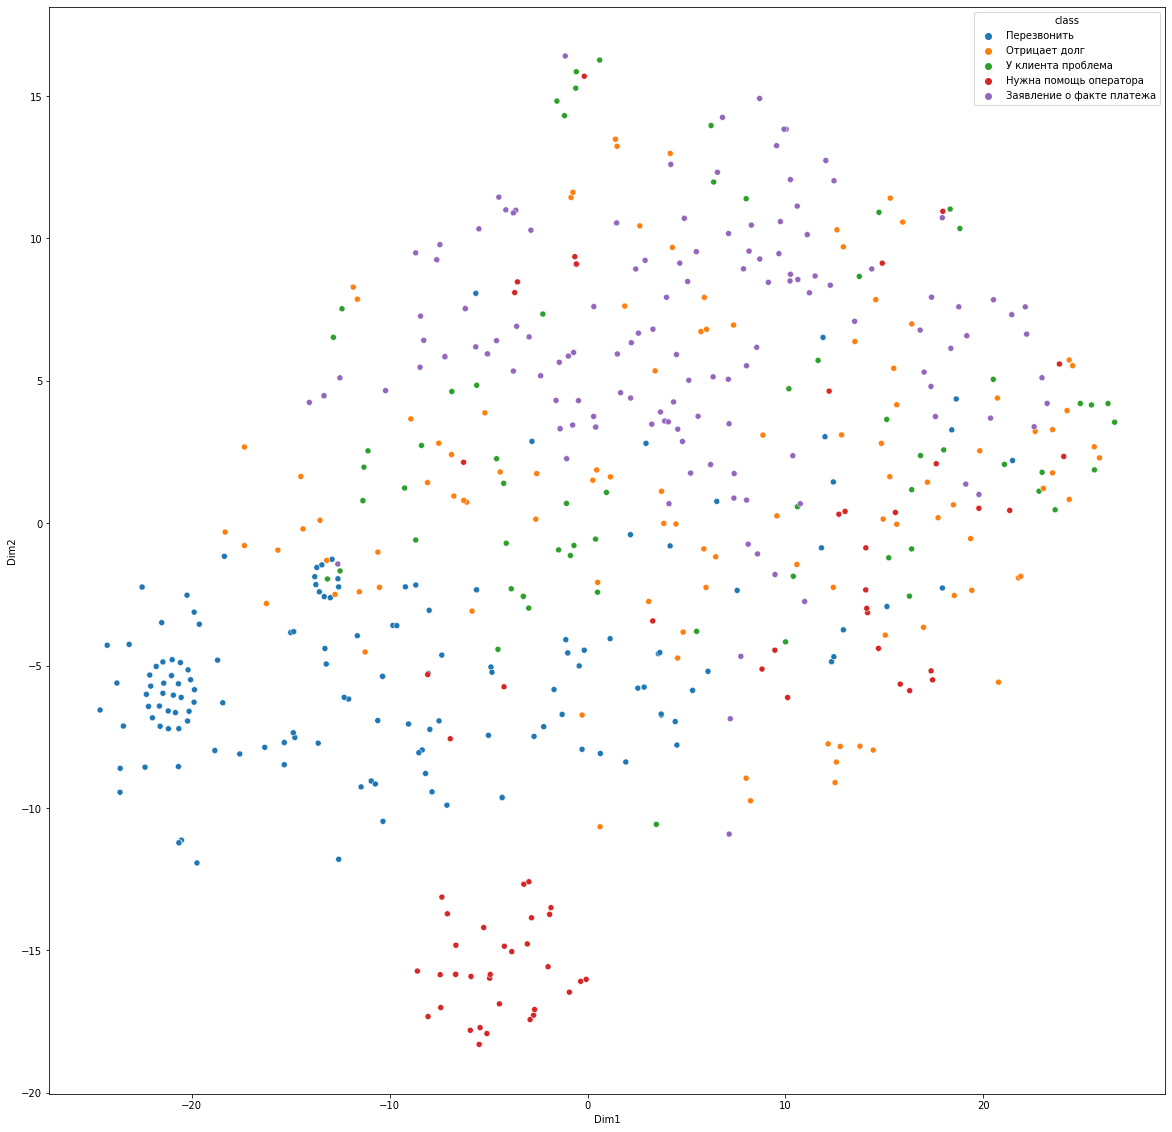

In [1326]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df_tsne, hue='class', x='Dim1', y='Dim2')
plt.show()

In [1327]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(texts_navec)
    Sum_of_squared_distances.append(km.inertia_)

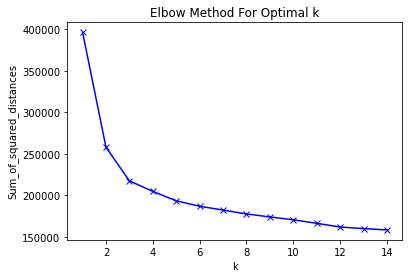

In [1328]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [1329]:
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(texts_navec)
clusters = kmeans.labels_

In [1330]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)

pca_vecs = pca.fit_transform(texts_navec)

x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

data = {'Dim1': x0, 'Dim2': x1, 'class': clusters}
df_pca = pd.DataFrame(data)
df_pca.head()

,Dim1,Dim2,class
0,-17.572709,-0.822096,4
1,-12.895747,-1.301099,4
2,-5.232890,-4.755606,3
3,-5.670496,2.145527,0
4,-11.085860,-4.082744,4


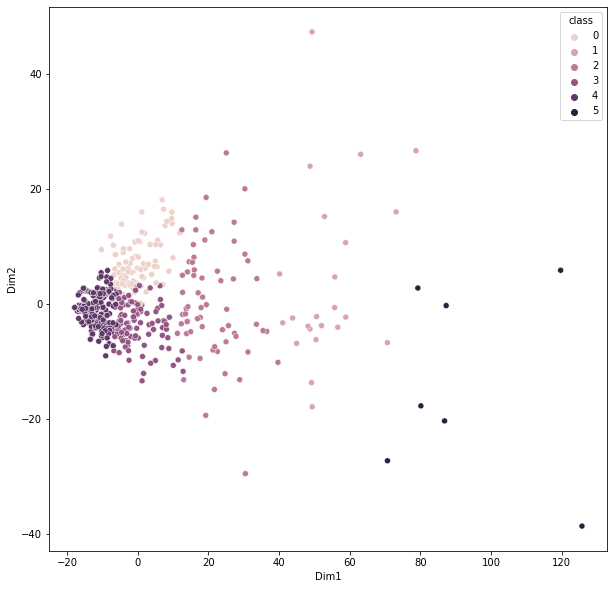

In [1331]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_pca, hue='class', x='Dim1', y='Dim2')
plt.show()

In [1332]:
index_test = df_pca[df_pca['class']  == 2].index

In [1334]:
data_model.iloc[index_test][['NPS','clean_texts']].NPS.value_counts()

Отрицает долг                21
Заявление о факте платежа    14
У клиента проблема           13
Нужна помощь оператора       12
Перезвонить                   5
Name: NPS, dtype: int64

In [48]:
index_test = df_pca[df_pca['class']  == 2].index
data_model.iloc[index_test][['targets','clean_texts']].targets.value_counts()

Должник - Нужна помощь оператора         37
Обрыв соединения                         29
Обещание заплатить                       11
Отказ от платежа                          6
Отрицает долг                             5
Платеж поступил                           4
Никто не подходит                         2
Третье лицо - Не передадут информацию     2
Третье лицо - Клиент неизвестен           1
Name: targets, dtype: int64

---

# Encoder

In [1335]:
import transformers
import torch
from typing import Tuple, List
from functools import partial
from torch.utils.data import Dataset, DataLoader, RandomSampler
from torch.nn.utils.rnn import pad_sequence
import torch.nn as nn
import torch.optim as optim
from transformers import AutoTokenizer, AutoModel

In [1336]:
tokenizer_sber = AutoTokenizer.from_pretrained("sberbank-ai/sbert_large_nlu_ru")
model_sber = AutoModel.from_pretrained("sberbank-ai/sbert_large_nlu_ru")

In [1337]:
tokens_info = tokenizer_sber(list(data_model['clean_texts']), padding=True, truncation=True, return_tensors="pt", 
                            max_length=256)

with torch.no_grad():
    out = model_sber(**tokens_info)

print(out['pooler_output'])

tensor([[ 0.5054, -0.0296, -0.8698,  ..., -0.3784,  0.9984, -0.0499],
        [ 0.3287,  0.1719, -0.8276,  ..., -0.2694,  0.5025,  0.1688],
        [ 0.2180,  0.0583, -0.7411,  ..., -0.2123,  0.7231, -0.0313],
        ...,
        [-0.1758, -0.1217, -0.8697,  ..., -0.3962, -0.3458,  0.1830],
        [ 0.7815,  0.0173, -0.8236,  ..., -0.0396, -0.6498,  0.0080],
        [ 0.4383,  0.0130, -0.8408,  ..., -0.1753,  0.2583, -0.0232]])


In [1360]:
def cos_sim(a, b):
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)
    return dot_product / (norm_a * norm_b)

In [1344]:
mean_pooled = out['pooler_output'].detach().numpy()

In [1361]:
cos_sim(mean_pooled[0], mean_pooled[1])

0.74070084

***

In [1369]:
texts_total_tokens_join = [' '.join(x) for x in texts_total_tokens]

# SKIP

# SKIP

### TF - IDF

In [18]:
texts_total_tokens_join = [' '.join(x) for x in texts_total_tokens]

NameError: name 'texts_total_tokens' is not defined

In [35]:
# task: find up to k most frequent tokens in texts_train,
# sort them by number of occurences (highest first)
k = min(60, len(set(' '.join(texts_total_tokens_join).split())))
all_words = (' '.join(texts_total_tokens_join).split())

bow_vocabulary = []
from collections import Counter
counts = Counter(all_words)
for word, freq in counts.most_common(k):
    bow_vocabulary.append(word)

print('example features:', sorted(bow_vocabulary)[::])

example features: ['ваш', 'весь', 'вносить', 'вообще', 'вопрос', 'всё', 'вчера', 'говорить', 'год', 'готовый', 'давать', 'девушка', 'день', 'деньга', 'договор', 'должный', 'ещё', 'жить', 'заплатить', 'звонить', 'знакомый', 'знать', 'интернет', 'месяц', 'мочь', 'номер', 'объяснять', 'оператор', 'оплата', 'оплачивать', 'отключать', 'передавать', 'платить', 'пожалуйста', 'пока', 'пользоваться', 'понимать', 'постараться', 'поступать', 'почему', 'просто', 'разговаривать', 'ростелеком', 'рубль', 'связь', 'сегодня', 'сказать', 'сколько', 'слушать', 'слышать', 'сумма', 'счёт', 'телефон', 'течение', 'угу', 'услуга', 'хотеть', 'человек', 'число', 'это']


In [36]:
def text_to_bow(text):
    """ convert text string to an array of token counts. Use bow_vocabulary. """
    array_10k = [0]*k
    for i in (text).split():
        for j in range(k):
            if (i == bow_vocabulary[j]):
                array_10k[j]+=1
    
    return np.array(array_10k, 'float32')

In [37]:
texts_bow = np.stack(list(map(text_to_bow, texts_total_tokens_join)))

In [38]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(texts_bow)
X_tsne_data = np.vstack((X_tsne.T, model_targets)).T
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'class'])
df_tsne.head()

,Dim1,Dim2,class
0,15.1667,3.748336,Должник - Клиент болен
1,9.203751,9.758083,Должник - Нужна помощь оператора
2,9.19426,10.440289,Должник - Нужна помощь оператора
3,8.054105,9.050941,Должник - Нужна помощь оператора
4,9.194259,10.44029,Должник - Нужна помощь оператора


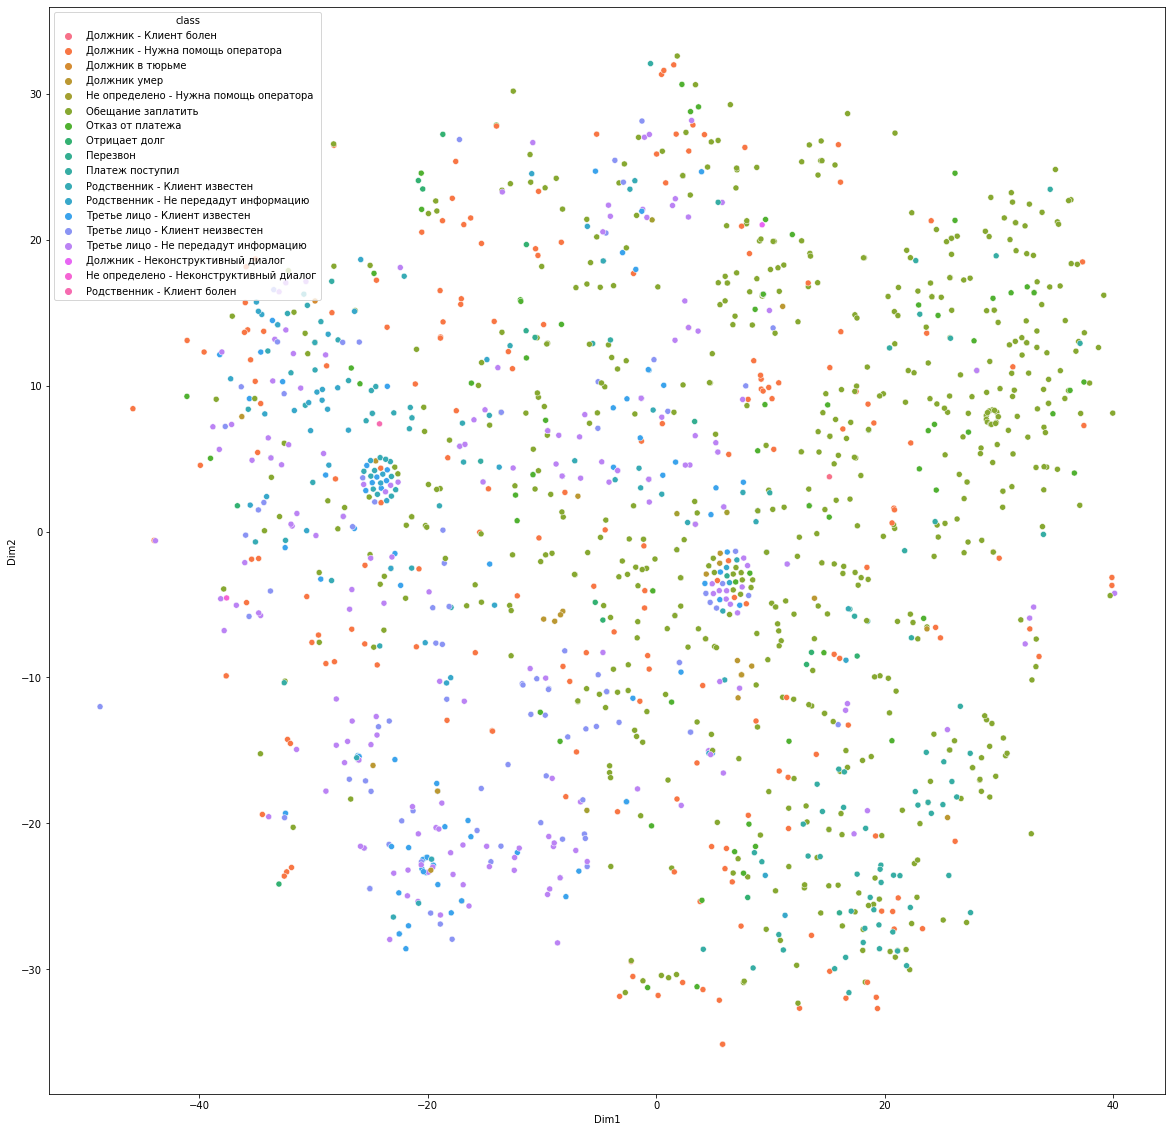

In [39]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df_tsne, hue='class', x='Dim1', y='Dim2')
plt.show()

<hr \>

# W2V

In [179]:
w2v = gensim.models.word2vec.Word2Vec(texts_total_tokens, min_count = 1, window = 3, vector_size = 100, sg=1)

In [180]:
w2v.build_vocab(texts_total_tokens)
w2v.train(texts_total_tokens, total_examples = w2v.corpus_count, epochs = 1000, report_delay = 1)

(10401733, 15298000)

In [181]:
w2v.wv.most_similar(positive = ['ростелеком'], topn = 5)

[('прижимать', 0.40173855423927307),
 ('молчать', 0.39708971977233887),
 ('направлять', 0.37930479645729065),
 ('оказывать', 0.3755388557910919),
 ('посоветовать', 0.3725096881389618)]

In [182]:
def vectorize_sum_custom(comment):
    """
    implement a function that converts preprocessed comment to a sum of token vectors
    """
    embedding_dim = w2v.wv.vector_size
    features_skip = np.zeros([embedding_dim], dtype='float32')
    features_skip_end = []
    try:
        [w2v.wv[x] for x in comment]
        
    except Exception as e:
        
        for number, i in enumerate(comment):
            try:
                embeddings[i]
            except Exception as e:
                features_skip_end.append(features_skip)
            else:
                features_skip_end.append(w2v.wv[i])
        
        return np.array(features_skip_end).sum(axis = 0)
                
    
    else:
        
        features = np.array([w2v.wv[x] for x in comment]).sum(axis=0)
        return features

In [183]:
texts_custom = np.stack([vectorize_sum_custom(text) for text in texts_total_tokens])

In [185]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(texts_custom)
X_tsne_data = np.vstack((X_tsne.T, model_targets)).T
df_tsne = pd.DataFrame(X_tsne_data, columns=['Dim1', 'Dim2', 'class'])
df_tsne.head()

,Dim1,Dim2,class
0,29.515898,-15.055321,Должник - Клиент болен
1,-20.779013,23.618988,Должник - Нужна помощь оператора
2,-18.795176,25.731096,Должник - Нужна помощь оператора
3,-18.152245,24.046915,Должник - Нужна помощь оператора
4,-22.432917,23.655861,Должник - Нужна помощь оператора


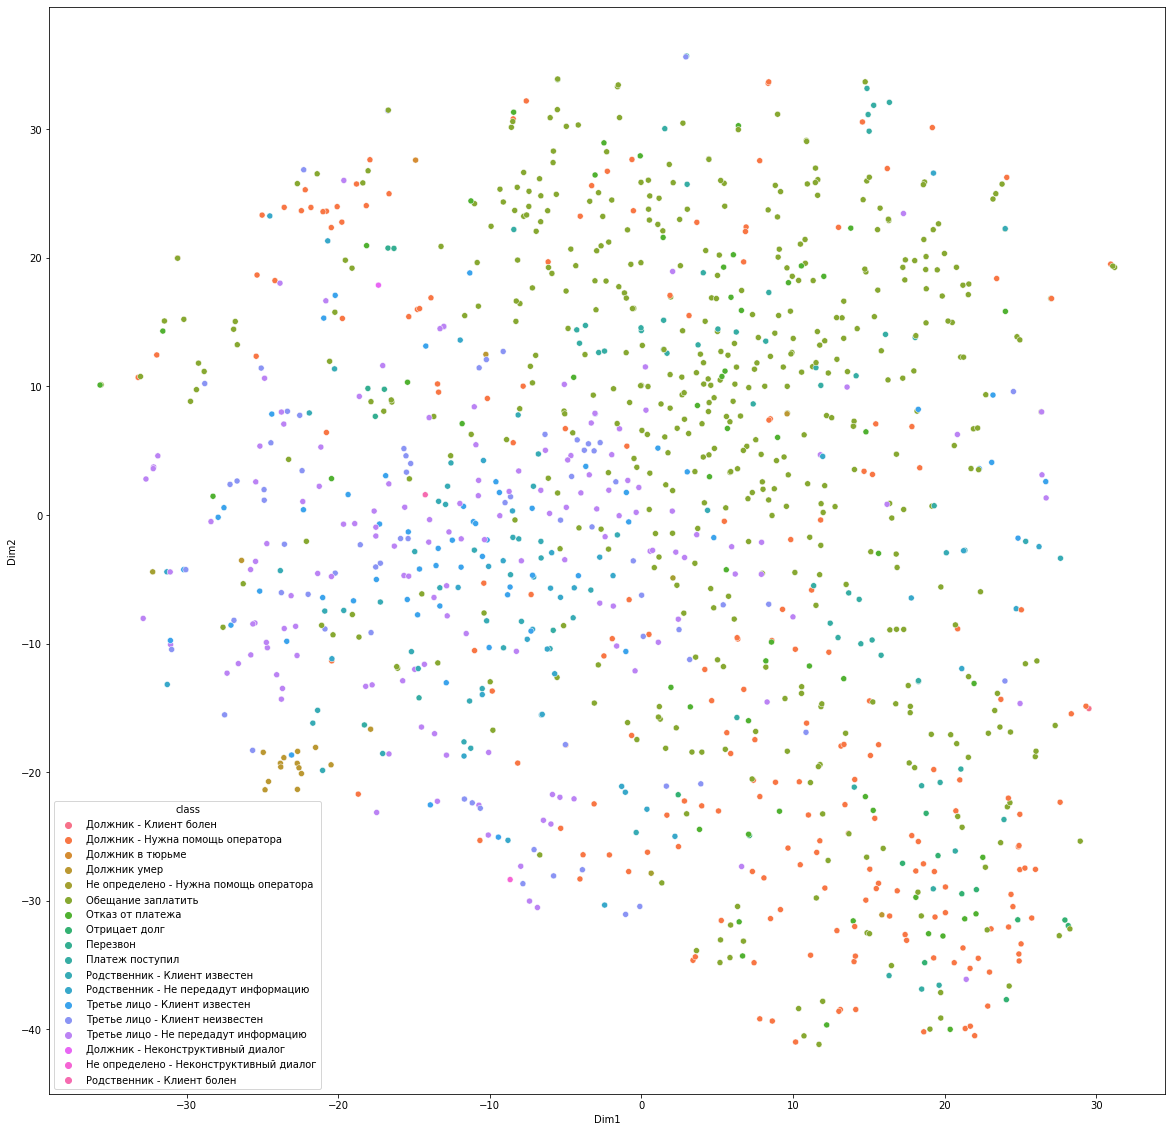

In [186]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df_tsne, hue='class', x='Dim1', y='Dim2')
plt.show()

# START

# START

# Chinese Whispers

In [1384]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0)

tfidf_matrices = []
data_sets = []

data_sets.append(texts_total_tokens_join)#(data_model['clean_texts'])
tfidf_matrices.append(tf.fit_transform(texts_total_tokens_join))#(data_model['clean_texts']))

In [1385]:
from sklearn.metrics.pairwise import linear_kernel
matrix_with_cos_sim = []
for m in tfidf_matrices:
    matrix_with_cos_sim.append(linear_kernel(m, m))

In [1390]:
from tqdm import tnrange
top_n_sentences = []
for cs, t in zip(matrix_with_cos_sim, data_sets):
    no_dups = np.array(t)
    i = 0
    top_frame = []
    for c, z in zip(cs, tnrange(len(cs))):
        start_name = pd.Series([no_dups[i]]*10) 
        ix_top_n = np.argsort(-c)[0:10]
        cos_sim = pd.Series(c[ix_top_n])
        names = pd.Series(no_dups[ix_top_n])
        i +=1
        top_frame.append(pd.DataFrame([start_name, names, cos_sim]).transpose())
    
    top_frame = pd.concat(top_frame)
    top_frame.columns = ['title1', 'title2', 'cos_sim']
    top_frame['is_same'] = [bool(i==j) for i, j in zip(top_frame['title1'], top_frame['title2'])]
    top_frame = top_frame[top_frame['is_same'] != True]
        
    top_n_sentences.append(top_frame)

  0%|          | 0/533 [00:00<?, ?it/s]

In [1391]:
top_frame = top_n_sentences[0]
edges = list(zip(top_frame['title1'], top_frame['title2']))
weighted_edges = list(zip(top_frame['title1'], top_frame['title2'], top_frame['cos_sim']))
nodes = list(set(top_frame['title1']).union(set(top_frame['title2'])))

In [1392]:
G = nx.Graph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)
G.add_weighted_edges_from(weighted_edges)

In [1393]:
chinese_whispers(G, weighting='top', seed=1337) 

print('ID\tCluster\n')

for label, cluster in sorted(aggregate_clusters(G).items(), key=lambda e: len(e[1]), reverse=True):
    print('{}\t{}\n'.format(label, cluster))

ID	Cluster

427	{'вопрос соединять оператор', 'давать слушать оператор соединять вопрос связывать оплата', '2600 па рубль давать брать ничто брать сей карта новый', 'это вопрос задавать мочь задавать вопрос задавать повод оплата производ семя вопрос вести сказать оплачивать', 'мочь услышать нужный оператор проговаривать давать оператор проговаривать робот давать', 'это знать война', 'ебать сайт оператор оператор блядь', 'ступа девушка почему проходить это вчера смотреть личный кабинет ничто сказать просто говорить подсказывать почему заглядывать личный кабинет написать ничто должный', 'весь верный разговаривать угол командировка месяц пользоваться пока интернет это приостанавливать временно приостанавливать связываться оператор', 'говорить девушка оператор соединять', 'робот мочь услышать оператор переключать сколько говорить это переключать оператор нужно', 'слушать основание вообще приостанавливать услуга', 'соединять оператор', 'это это соединять оператор', 'говорить слушать снимать

In [1394]:
data_model['clusters'] = np.nan

for index, row in data_model.iterrows():
    for label, cluster in sorted(aggregate_clusters(G).items()):
        for i in cluster:
            if row['tokens_agg'] == i:
                data_model['clusters'].loc[index] = label
                break

In [1383]:
data_model.NPS.value_counts()

Перезвонить                  148
Заявление о факте платежа    144
Отрицает долг                107
Нужна помощь оператора        68
У клиента проблема            66
Name: NPS, dtype: int64

## Оператор

In [1395]:
data_model_oper = data_model[data_model['NPS'] == 'Нужна помощь оператора']

In [1398]:
data_model_oper.clusters.value_counts()

427.0    49
352.0     6
226.0     3
44.0      3
126.0     1
200.0     1
283.0     1
34.0      1
465.0     1
16.0      1
169.0     1
Name: clusters, dtype: int64

In [ ]:
# 427 - оператор
# 352 расторжение договора - наверно оператор
# 226 отключение услуг - оператор
# 44 не знает на какой счет деньги класть - оператор
# остальное - оператор (другие причины)

### Итог оператор
* Всего -  68, 75% - оператор, 12% - расторжение договора, 7% - отключение услуг, 7% - на каком счете долг

## Проблемы

In [1413]:
data_model_problem = data_model[data_model['NPS'] == 'У клиента проблема']

In [1414]:
data_model_problem.clusters.value_counts()

226.0    17
44.0     15
200.0     7
352.0     7
283.0     4
126.0     3
255.0     3
169.0     2
68.0      2
465.0     2
406.0     1
16.0      1
221.0     1
427.0     1
Name: clusters, dtype: int64

In [1443]:
data_model_problem[data_model_problem['clusters'] == 465].clean_texts.values[0]

' алло  конечно  конечно пришлите квитанцию бумажную я оплачу у меня нет реквизитов не работает мобильное предложение пришли квитанцию бумажную я оплачу'

In [ ]:
# 226 отключение услуг - оператор
# 44 не знает на какой счет деньги класть - оператор
# 200 куда платить то - оператор
# 352 расторжение договора - наверно оператор
# 283 куда идти - оператор
# 255 - внесет деньги
# 169 - ничего не работает
# 68 - обрыв 
# 465 - квитанцию то пришлите 

### Итог проблемы
* Всего - 66, 26% - отключите услуги, 23% - на какой счет класть, 10% - куда платить , 10% - расторжение догвора, 6% - куда физически идти платить, 25% - ничего не работает, обрыв, жду квитанцию, оплачу

## Get off

In [1444]:
data_model_off = data_model[data_model['NPS'] == 'Отрицает долг']

In [1446]:
data_model_off.clusters.value_counts()

283.0    14
169.0     9
126.0     9
200.0     9
90.0      8
16.0      8
44.0      8
226.0     7
427.0     6
221.0     4
42.0      4
465.0     4
406.0     4
68.0      2
352.0     2
307.0     2
34.0      2
293.0     1
50.0      1
255.0     1
387.0     1
308.0     1
Name: clusters, dtype: int64

In [ ]:
# 283, 427, 90 , 200 - не тот номер либо за что задолженность то
# 169 - за какие услуги долг
# 126 - оплатит(оплатила) когда что-то будет сделано либо не понимает откуда долг
# 16 -  не пользуюсь/в блоке откуда долг
# 44 - долг на какой адресс куда платить
# 226 - отключение услуг

### Итог отрицает долг
* Всего - 107, 50% - за что долг то, 11% - за какие услуги долг, 11% - оплатит(оплатил) после каких-то работ либо откуда долг, 10% - не пользуюсь блокировка откуда долг, 10% - долг на какой адрес то, 8% - отключите

## Перенабери

In [1485]:
data_model_recall = data_model[data_model['NPS'] == 'Перезвонить']

In [1487]:
data_model_recall.clusters.value_counts()

84.0     48
278.0    19
68.0     17
454.0     9
264.0     8
352.0     7
10.0      4
283.0     3
307.0     3
114.0     3
169.0     3
200.0     3
105.0     3
434.0     3
295.0     2
126.0     2
427.0     2
90.0      1
308.0     1
465.0     1
255.0     1
226.0     1
44.0      1
387.0     1
221.0     1
42.0      1
Name: clusters, dtype: int64

In [ ]:
# 84 - перезвони на работе
# 278 - на работе
# 68 - занят
# 454 - вечером набрать
# 264 - сейчас не может говорить
# 352 - автоответчик
# 10 - неудобно

### норм

## Заплатил

In [1507]:
data_model_payed = data_model[data_model['NPS'] == 'Заявление о факте платежа']

In [1509]:
data_model_payed.clusters.value_counts()

126.0    23
465.0    21
255.0    20
201.0    19
406.0    11
307.0    10
72.0      9
50.0      9
200.0     7
226.0     4
110.0     2
387.0     2
293.0     2
169.0     2
68.0      1
454.0     1
44.0      1
Name: clusters, dtype: int64

In [1530]:
data_model_payed[data_model_payed['clusters'] == 387].clean_texts.values[1]

' алло алло  совершенно верно    уже оплатил  да'

In [1531]:
# 126 - оплатила
# 465 - оплата
# 255 - оплата
# 201 - вчера оплата
# 406 - оплата
# 307 - оплата сегодня
# 72 - оплатила
# 50 - оплата
# 200 - оплата
# 226 отключите - потом оплата
# 110 - скоро внесет
...

Ellipsis

### норм

***

In [4]:
# implement som later

In [5]:
import pandas as pd
data = pd.read_excel('robot_graph_res.xlsx')